## Explore the alpha parameter being a nonlinear function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define AIMD with nonlinear alpha and beta
def aimd_nonlinear(w, k, n, c, C, num_users):
    """
    AIMD with nonlinear alpha and beta.
    :param w: Current window size.
    :param k: Constant for alpha.
    :param n: Exponent for alpha.
    :param c: Constant for beta.
    :param C: Bottleneck capacity.
    :param num_users: Number of TCP users/flows.
    :return: Updated window size.
    """
    # Nonlinear alpha: alpha = k * w^n
    alpha = k * (w ** n)
    
    # Nonlinear beta: beta = 1 - c * log(w + 1)
    beta = 1 - c * np.log(w + 1)
    
    # Check for congestion
    if w >= C / num_users:  # Congestion detected
        w = w * beta  # Multiplicative decrease
    else:
        w = w + alpha  # Additive increase
    
    return w

 ## Simulate multiple TCP flows sharing a single bottleneck. I use the nonlinear AIMD algorithm for each flow

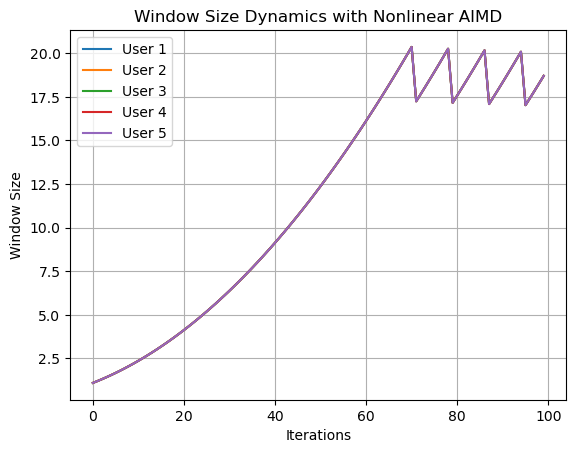

In [2]:
# Simulation parameters
C = 100  # Bottleneck capacity (Mbps)
num_users = 5  # Number of TCP users/flows
k = 0.1  # Constant for alpha
n = 0.5  # Exponent for alpha
c = 0.05  # Constant for beta
num_iterations = 100  # Number of iterations

# Initialize window sizes for each user
window_sizes = np.ones(num_users)  # Start with window size = 1 for each user

# Store window sizes over time
window_history = np.zeros((num_users, num_iterations))

# Run simulation
for i in range(num_iterations):
    for j in range(num_users):
        window_sizes[j] = aimd_nonlinear(window_sizes[j], k, n, c, C, num_users)
    window_history[:, i] = window_sizes

# Plot results
plt.figure()
for j in range(num_users):
    plt.plot(window_history[j, :], label=f'User {j + 1}')
plt.title('Window Size Dynamics with Nonlinear AIMD')
plt.xlabel('Iterations')
plt.ylabel('Window Size')
plt.legend()
plt.grid()
plt.show()

## analyze whether the window sizes converge to a stable solution, by checking if the window sizes approach the right eigenvector of the system matrix 

In [3]:
# Define the system matrix A
A = np.ones((num_users, num_users))  # Assume all flows interact equally

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Find the eigenvector corresponding to the largest eigenvalue
dominant_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]

# Normalize the eigenvector
dominant_eigenvector = dominant_eigenvector / np.sum(dominant_eigenvector)

# Compare with the final window sizes
final_window_sizes = window_history[:, -1]
final_window_sizes = final_window_sizes / np.sum(final_window_sizes)

print("Dominant Eigenvector:", dominant_eigenvector)
print("Final Window Sizes (Normalized):", final_window_sizes)

Dominant Eigenvector: [0.2 0.2 0.2 0.2 0.2]
Final Window Sizes (Normalized): [0.2 0.2 0.2 0.2 0.2]


## Visualize the dynamics of the window sizes and compare with the dominant eigenvector

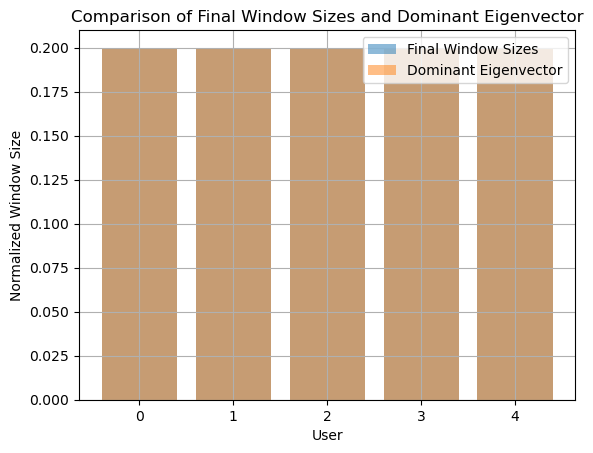

In [4]:
# Plot final window sizes vs dominant eigenvector
plt.figure()
plt.bar(range(num_users), final_window_sizes, alpha=0.5, label='Final Window Sizes')
plt.bar(range(num_users), dominant_eigenvector, alpha=0.5, label='Dominant Eigenvector')
plt.title('Comparison of Final Window Sizes and Dominant Eigenvector')
plt.xlabel('User')
plt.ylabel('Normalized Window Size')
plt.legend()
plt.grid()
plt.show()

## Analysis
### Dominant Eigenvector: [0.2, 0.2, 0.2, 0.2, 0.2] is the eigenvector corresponding to the largest eigenvalue of the system matrix A
- It represents the steady-state distribution of resources (window sizes) among the TCP flows.
- In this case, the dominant eigenvector suggests that the system converges to a state where all 5 users share the bottleneck link equally (each gets 20% of the total capacity).
### Final Window Sizes (Normalized): [0.2, 0.2, 0.2, 0.2, 0.2]
- It represents the normalized window sizes of the 5 TCP flows at the end of the simulation.
- Since they match the dominant eigenvector, this indicates that the system has converged to the predicted steady state.
## Conclusion: the window sizes converge to a stable solution
### Fairness
- The convergence to equal shares ([0.2, 0.2, 0.2, 0.2, 0.2]) shows that the AIMD algorithm, with the chosen non-linear alpha and beta parameters, achieves fairness among the TCP flows.
- Each user gets an equal share of the bottleneck capacity.
### Stability
- The system reaches a stable equilibrium where the window sizes no longer fluctuate significantly.
- This is a desirable property for congestion control algorithms, as it prevents oscillations and ensures predictable performance.

### Equal Shares
- The convergence to equal shares ([0.2, 0.2, 0.2, 0.2, 0.2]) suggests that the AIMD algorithm is working as intended, and the network is fair.
### Nonlinear Alpha and Beta
- The fact that convergence occurs with nonlinear alpha and beta parameters demonstrates that these innovations can still achieve fairness and stability.